# __Learning X2K: Genetic Algorithm Results__

## __Import data__

In [5]:
%matplotlib inline
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}

import numpy as np
import matplotlib.pyplot as plt
# Import my functions
import Python_scripts.Extra_X2K_functions as Ex

import os
root = os.getcwd()
picFormat='png'

# Data   
#GA_output_name = 'GA_results.100pop.10gen.GEO.run3.npy' #
#GA_output_name = 'GA_results.100pop.10gen.L1000-DRH.npy' #
#GA_output_name = 'GA_results_L1000-DRH.rboScore.npy' #
#GA_output_name = 'GA_results_GEO.RankWeightedMean.npy'
GA_output_name = 'GA_results_GEO.wPPIlimiters.npy'


results_file = root+'/GA_Results/GEO/'+GA_output_name
#results_file = root+'/GA_Results/L1000_DRH/'+GA_output_name

GA_Results = np.load(results_file)
# Make folder for saved images
figDir = 'Figures/'+GA_output_name
if not os.path.exists(figDir):
    os.makedirs(figDir)
# Extract subsets
GAresults_Subset1 = GA_Results[0]

## Subset 1
allPopulations = GAresults_Subset1[0]# Get all populations
allFitnesses = GAresults_Subset1[1] # Get all fitnesses
averageFitness = GAresults_Subset1[2] # Get averageFitnenss per generation
peakFitness = GAresults_Subset1[3] # Get the peakFitness per generation
GAsettings = GAresults_Subset1[4]
average_PPI_sizes = GAresults_Subset1[5] # Average_PPI_sizes
## Subset 2
allFitnesses_Subset2 = GA_Results[1]
averageFitness_Subset2 = GA_Results[2]
peakFitness_Subset2 = GA_Results[3]
#average_PPI_sizes_Subset2 = GA_Results[4]


chance = 4.22;

FileNotFoundError: [Errno 2] No such file or directory: 'X2K_Genetic_Algorithm/GA_Results/GEO/GA_results_GEO.wPPIlimiters.npy'

## Report Top N Fittest Individual Parameters

# Get all individuals with the peak fitness in the final generation
# then calculate the percentage of those individuals that have the most common parameter option
def topParameterReport(GAresults):
    import seaborn as sn
    df = Ex.parameterDF(GAresults)
    # Filter only those that had the highest fitness score
    df2 = df[(df["Fitness"]==max(df.Fitness)) & (df["Generation"]==max(df.Generation))]
    # If there's less than 10 instances of the same top fitness, use the top 10 fitnesses instead
    if len(df2) <= 10:
        df2 = df.sort_values(by=['Fitness'], ascending=False).head(10)
    # Print percentages
    params = ['KINASE_background', 'KINASE_interactome', 'KINASE_sort',\
           'KINASE_topKinases', 'PPI_databases', 'PPI_pathLength', 'TF_background',\
           'TF_databases', 'TF_sort', 'TF_species', 'TF_topTFs']
    plt.figure()
    plt.subplots(2, 3, sharey=True)
    f, ax = plt.subplots(3, 4, sharey=True)

    for i,param in enumerate(params):
        paramFreqs = df2.groupby([param])[param].count()
        percent = round(max(paramFreqs) / sum(paramFreqs)*100,2)
        if param == 'PPI_databases':
                if percent != 100:
                    dfSorted = paramFreqs.sort_values(ascending=False)
                    topRow = dfSorted.head(2)
                    secondRow = paramFreqs[]
        print(param+": "+str(percent)+"% of the fittest individuals chose <"+paramFreqs.idxmax()+">")
        #paramFreqs.plot(kind='bar', x=paramFreqs.index, y=paramFreqs, stacked=True)
        plt.subplot(3,4,i+1)
        sn.barplot(y=paramFreqs, x=paramFreqs.index)
## Training set
topParameterReport(GAresults_Subset1)   
## Test set

tips = sn.load_dataset("tips")

## Test set

## __GA Settings__

In [13]:
GAsettings

{'breedingVariation': 0,
 'childrenPerGeneration': 90,
 'crossoverPoints': 7,
 'includeFittestParents': 10,
 'initialPopSize': 100,
 'mutationRate': 0.01,
 'numberOfGenerations': 50,
 'parameterLength': 43,
 'topNum': 10}

## Report Peak Fitnesses

In [2]:
print('Peak fitness for Subset1 = '+str(round(peakFitness[-1],2)))
print('Peak fitness for Subset2 = '+str(round(peakFitness_Subset2[-1],2))+'\n')
print("===============================\n")

print('OPTIMIZED PARAMETERS:')
print(str(Ex.tell_parameters(Ex.getFittestIndividual(GAresults_Subset1))))

# For a more directly interpretable metric, can use 'Target-adjusted Overlap'...
# which basically equates to the % of experiments that the any target kinase was recovered anywhere in the output, divided by the number of possible targets
#rankWeightedFitness = Ex.calculateFitness( Ex.getFittestIndividual(GAresults_Subset1), fitness_method="Rank-Weighted Mean")
#print('Peak fitness [Target-Adjusted Overlap]'+str( rankWeightedFitness[0 )


avg = sum(average_PPI_sizes[-1]) / len(average_PPI_sizes[-1])
print()
print("===============================\n")
print("Average PPI size in final Subset1 population = "+str(avg));

NameError: name 'peakFitness' is not defined

## __Overfitting Tests__

### Average fitness 

In [3]:
#y_s1 = GAresults_Subset1[2] # average fitness for each generation in TRAINED data
#y_s2 = averageFitness_Subset2

# Calculate average for subset one
y1 = allFitnesses
x = range(1,len(y1)+1)
x, y_s1 = zip(*sorted((xVal, np.mean([yVal for a, yVal in zip(x, y1) if xVal==a])) for xVal in set(x)))
# Calculate average for subset 2
y2 = allFitnesses_Subset2 
x, y_s2 = zip(*sorted((xVal, np.mean([yVal for a, yVal in zip(x, y2) if xVal==a])) for xVal in set(x)))

yerr1 = np.std(y1, axis=1)
yerr2 = np.std(y2, axis=1)
plt.errorbar(x, y_s1, yerr=yerr1, color='c', marker='o', capsize=2, label="Training Data")
plt.errorbar(x, y_s2, yerr=yerr2, color='g', marker='s', capsize=2, label="Test Data")
#plt.axhline(y=chance, linestyle="--", color='r', label="Chance Levels")
plt.title('')
plt.xlabel('Generation')
plt.ylabel('Average Fitness')
#plt.xticks(np.arange(1, max(x), 10))
plt.legend(loc='lower right', borderaxespad=2)
plt.gcf().set_facecolor('white')
#plt.ylim([5, 35])

plt.savefig(figDir+'/OverfittingAvg.'+picFormat, format=picFormat, dpi=1000)




# TEST OVERFITTING
import pandas as pd
## Unlist Subset1 Fitnesses
fit1_df = pd.DataFrame(Ex.parameterDF(GAresults_Subset1)['Fitness'])
fit1_df.columns = ['Average_Fitness']
fit1_df['Trained_v_Test'] = 'Trained'
## Unlist Subset2 Fitnesses
fit2 = []
for sublist in allFitnesses_Subset2:
    for item in sublist:
        fit2.append(item)
fit2_df = pd.DataFrame(fit2, columns=['Average_Fitness'])
fit2_df['Trained_v_Test'] = 'Test'

lm_data = pd.concat([fit1_df, fit2_df])
## Get OLS R2
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('Average_Fitness ~ Trained_v_Test',data=lm_data).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
p = aov_table['PR(>F)'][0]
mod.summary()

print(aov_table)
print("************************************************************************")
if p>0.05:
    print('Training and Test runs do NOT significantly differ.')
else:
    print('Training and Test runs DO significantly differ');

NameError: name 'allFitnesses' is not defined

### Peak fitness

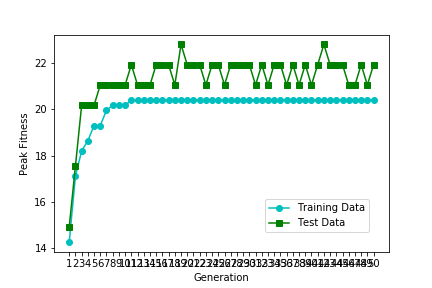

In [16]:
y_s1 = GAresults_Subset1[3] # Peak fitness for each generation in TRAINED data
y_s2 = peakFitness_Subset2
x = range(1,len(y_s1)+1)
# Error bars wouldn't make sense since there's only one peak fitness per gen
#yerr1 = 0.1 + 0.2*np.sqrt(y_s1)
#yerr2 = 0.1 + 0.2*np.sqrt(y_s2)
plt.errorbar(x, y_s1, color='c', marker='o', capsize=2, label="Training Data")
plt.errorbar(x, y_s2, color='g', marker='s', capsize=2, label="Test Data")
#plt.axhline(y=chance, linestyle="--", color='r', label="Chance Levels")
plt.title('')
plt.xlabel('Generation')
plt.ylabel('Peak Fitness')
#plt.xticks(np.arange(1, max(x)+1, 1))
plt.legend(loc='lower right', borderaxespad=2)
plt.gcf().set_facecolor('white')
#plt.ylim([5, 35])
    
plt.savefig(figDir+'/OverfittingPeak.'+picFormat, format=picFormat, dpi=1000);

### Plot the distribution of ALL fitnesses in sampling of generations

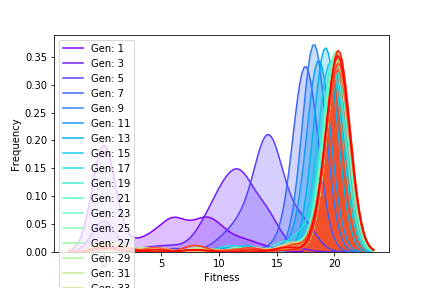

In [17]:
Ex.fitnessHistogramCurves(allFitnesses, genSpacing=10)
#plt.ylim([0,.3])
#plt.xlim([0,35])
plt.legend(loc='upper left')


plt.savefig(figDir+'/KDEfitnessPlot.'+picFormat, format=picFormat, dpi=1000);
# EPS format doesn't support transparency. Have to save as png instead.

## __4. X2K Parameters vs. Fitness Analyses__

### Plot Fitness and Parameter Evolution Over Time


___TF (CHEA) Parameters___
run;pvalue;human;transfac;humanarchs4;20

___PPI (G2N) Parameters___
run;BIOCARTA,FIGEYS,HPRD,INNATEDB,KEGG,PDZBASE,SNAVI,STELZL,VIDAL;1

___KINASE (KEA) Parameters___
run;oddsratio;humanarchs4;P;20



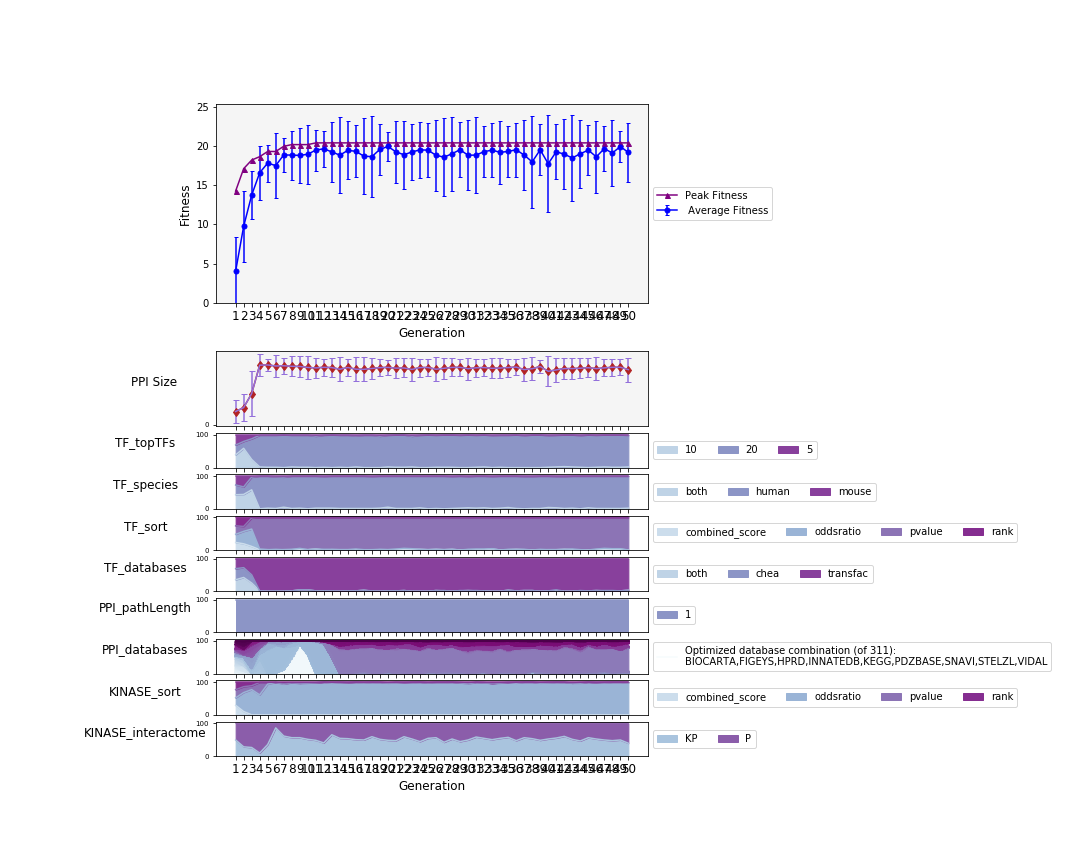

In [18]:
Ex.parameterEvolutionPlot(GAresults_Subset1,figsize=(15,12))

plt.savefig(figDir+'/ParamEvolution.'+picFormat, format=picFormat, dpi=1000);

### Plot Select X2K Parameters vs. Fitness

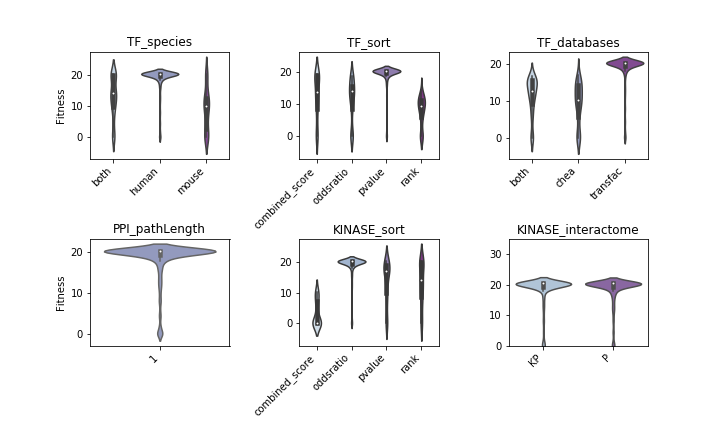

In [19]:
Ex.ParameterBoxplots(GAresults_Subset1, numRows=2, numCols=3, figSize=(10,6))
plt.ylim([0,35])

plt.savefig(figDir+'/Parameters.Vs.Fitness.'+picFormat, format=picFormat, dpi=1000);

### One-way ANOVAs: Each parameter vs. Fitness

In [20]:
#Ex.parameterStats(GAresults_Subset1, writeExcel=figDir+"/Parameter.v.Fitness_ANOVA.table.xlsx")
#plt.savefig(figDir+'/Parameter.v.Fitness_ANOVA.table.eps', format='eps', dpi=1000)